In [84]:
import os
import json
import math
import pickle
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline
%load_ext autoreload
%autoreload 2

params = {
    'axes.labelsize': 10,
    'font.size': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 12,
    'ytick.labelsize': 10,
    'text.usetex': False,
    'figure.figsize': [8, 8]
}
matplotlib.rcParams.update(params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
data_dir = 'data/'

In [58]:
def encode(fobj):
    fname = "fn={0}_n={1}_solver={2}".format(
        fobj['fn'], fobj['n'], fobj['solver']
    )
    fname += "_lr={0}_alpha={1}_armijosParams={2}".format(
        fobj['lr'], fobj['alpha'], fobj['armijosParams']
    )
    fname += "_termCrit={0}_maxIters={1}.pkl".format(
        fobj['termCrit'], fobj['maxIters']
    )
    return os.path.join(data_dir, fname)

def decode(fname):
    fname = fname.replace(".pkl", "")
    comps = fname.strip().split('_')
    
    return {
        comp.split('=')[0]: comp.split('=')[1]
        for comp in comps
    }

all_data_files = os.listdir(data_dir)
all_data_files = [decode(fname) for fname in all_data_files]

In [38]:
def filter(fns=None, dims=None, solvers=None):
    res = all_data_files
    if fns is not None:
        if not isinstance(fns, list): fns = [fns]
        res = [fobj for fobj in res if fobj['fn'] in fns]
    if dims is not None:
        if not isinstance(dims, list): dims = [dims]
        res = [fobj for fobj in res if int(fobj['n']) in dims]
    if solvers is not None:
        if not isinstance(solvers, list): solvers = [solvers]
        res = [fobj for fobj in res if fobj['solver'] in solvers]
    return res
    

In [47]:
all_dims = [4, 16, 64, 256, 1024, 1600, 2048]
all_solvers = ['steepest-descent', 'fr-cg', 'pr-cg']
all_fns = ['powell', 'rosenbrock']

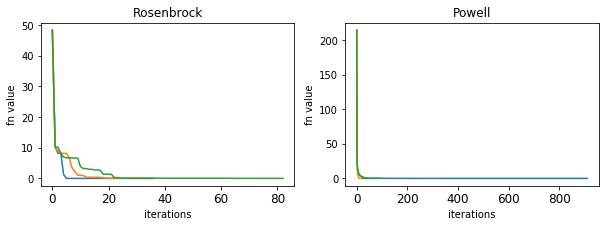

In [91]:
'''
dim = 4
   -- [plot 1] rosenbrock
       -- steepest-descent
       -- FR-CG
       -- PR-CG
   -- [plot 2] powell
       -- steepest-descent
       -- FR-CG
       -- PR-CG
'''

# Plot 1
f1_sd = encode(filter(fns='rosenbrock', dims=4, solvers='steepest-descent')[0])
f1_frcg = encode(filter(fns='rosenbrock', dims=4, solvers='fr-cg')[0])
f1_prcg = encode(filter(fns='rosenbrock', dims=4, solvers='pr-cg')[0])

with open(f1_sd, 'rb') as f: rosenbrock_sd = pickle.load(f)
with open(f1_frcg, 'rb') as f: rosenbrock_frcg = pickle.load(f)
with open(f1_prcg, 'rb') as f: rosenbrock_prcg = pickle.load(f)
    
fig = plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.title('Rosenbrock')
plt.xlabel('iterations')
plt.ylabel('fn value')
plt.plot(
    [pt['iter'] for pt in rosenbrock_sd['plot_data']],
    [pt['fx'] for pt in rosenbrock_sd['plot_data']],
    label='steepest-descent'
)
plt.plot(
    [pt['iter'] for pt in rosenbrock_frcg['plot_data']],
    [pt['fx'] for pt in rosenbrock_frcg['plot_data']],
    label='FR-CG'
)
plt.plot(
    [pt['iter'] for pt in rosenbrock_prcg['plot_data']],
    [pt['fx'] for pt in rosenbrock_prcg['plot_data']],
    label='PR-CG'
)
 
    
# Plot 2
f2_sd = encode(filter(fns='powell', dims=4, solvers='steepest-descent')[0])
f2_frcg = encode(filter(fns='powell', dims=4, solvers='fr-cg')[0])
f2_prcg = encode(filter(fns='powell', dims=4, solvers='pr-cg')[0])

with open(f2_sd, 'rb') as f: powell_sd = pickle.load(f)
with open(f2_frcg, 'rb') as f: powell_frcg = pickle.load(f)
with open(f2_prcg, 'rb') as f: powell_prcg = pickle.load(f)
    
plt.subplot(1, 2, 2)
plt.title('Powell')
plt.xlabel('iterations')
plt.ylabel('fn value')
plt.plot(
    [pt['iter'] for pt in powell_sd['plot_data']],
    [pt['fx'] for pt in powell_sd['plot_data']],
    label='steepest-descent'
)
plt.plot(
    [pt['iter'] for pt in powell_frcg['plot_data']],
    [pt['fx'] for pt in powell_frcg['plot_data']],
    label='FR-CG'
)
plt.plot(
    [pt['iter'] for pt in powell_prcg['plot_data']],
    [pt['fx'] for pt in powell_prcg['plot_data']],
    label='PR-CG'
)
plt.show()

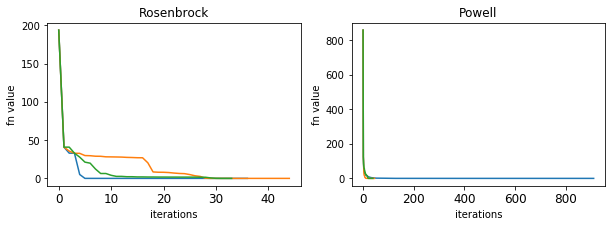

In [92]:
'''
dim = 16
   -- [plot 1] rosenbrock
       -- steepest-descent
       -- FR-CG
       -- PR-CG
   -- [plot 2] powell
       -- steepest-descent
       -- FR-CG
       -- PR-CG
'''

# Plot 1
f1_sd = encode(filter(fns='rosenbrock', dims=16, solvers='steepest-descent')[0])
f1_frcg = encode(filter(fns='rosenbrock', dims=16, solvers='fr-cg')[0])
f1_prcg = encode(filter(fns='rosenbrock', dims=16, solvers='pr-cg')[0])

with open(f1_sd, 'rb') as f: rosenbrock_sd = pickle.load(f)
with open(f1_frcg, 'rb') as f: rosenbrock_frcg = pickle.load(f)
with open(f1_prcg, 'rb') as f: rosenbrock_prcg = pickle.load(f)
    
fig = plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.title('Rosenbrock')
plt.xlabel('iterations')
plt.ylabel('fn value')
plt.plot(
    [pt['iter'] for pt in rosenbrock_sd['plot_data']],
    [pt['fx'] for pt in rosenbrock_sd['plot_data']],
    label='steepest-descent'
)
plt.plot(
    [pt['iter'] for pt in rosenbrock_frcg['plot_data']],
    [pt['fx'] for pt in rosenbrock_frcg['plot_data']],
    label='FR-CG'
)
plt.plot(
    [pt['iter'] for pt in rosenbrock_prcg['plot_data']],
    [pt['fx'] for pt in rosenbrock_prcg['plot_data']],
    label='PR-CG'
)
 
    
# Plot 2
f2_sd = encode(filter(fns='powell', dims=16, solvers='steepest-descent')[0])
f2_frcg = encode(filter(fns='powell', dims=16, solvers='fr-cg')[0])
f2_prcg = encode(filter(fns='powell', dims=16, solvers='pr-cg')[0])

with open(f2_sd, 'rb') as f: powell_sd = pickle.load(f)
with open(f2_frcg, 'rb') as f: powell_frcg = pickle.load(f)
with open(f2_prcg, 'rb') as f: powell_prcg = pickle.load(f)
    
plt.subplot(1, 2, 2)
plt.title('Powell')
plt.xlabel('iterations')
plt.ylabel('fn value')
plt.plot(
    [pt['iter'] for pt in powell_sd['plot_data']],
    [pt['fx'] for pt in powell_sd['plot_data']],
    label='steepest-descent'
)
plt.plot(
    [pt['iter'] for pt in powell_frcg['plot_data']],
    [pt['fx'] for pt in powell_frcg['plot_data']],
    label='FR-CG'
)
plt.plot(
    [pt['iter'] for pt in powell_prcg['plot_data']],
    [pt['fx'] for pt in powell_prcg['plot_data']],
    label='PR-CG'
)
plt.show()

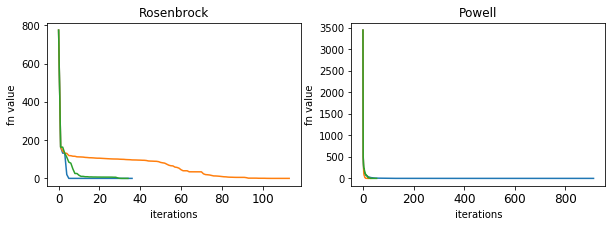

In [100]:
'''
dim = 64
   -- [plot 1] rosenbrock
       -- steepest-descent
       -- FR-CG
       -- PR-CG
   -- [plot 2] powell
       -- steepest-descent
       -- FR-CG
       -- PR-CG
'''
start_it = 0

# Plot 1
f1_sd = encode(filter(fns='rosenbrock', dims=64, solvers='steepest-descent')[0])
f1_frcg = encode(filter(fns='rosenbrock', dims=64, solvers='fr-cg')[0])
f1_prcg = encode(filter(fns='rosenbrock', dims=64, solvers='pr-cg')[0])

with open(f1_sd, 'rb') as f: rosenbrock_sd = pickle.load(f)
with open(f1_frcg, 'rb') as f: rosenbrock_frcg = pickle.load(f)
with open(f1_prcg, 'rb') as f: rosenbrock_prcg = pickle.load(f)
    
fig = plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.title('Rosenbrock')
plt.xlabel('iterations')
plt.ylabel('fn value')
plt.plot(
    [pt['iter'] for pt in rosenbrock_sd['plot_data'][start_it:]],
    [pt['fx'] for pt in rosenbrock_sd['plot_data'][start_it:]],
    label='steepest-descent'
)
plt.plot(
    [pt['iter'] for pt in rosenbrock_frcg['plot_data'][start_it:]],
    [pt['fx'] for pt in rosenbrock_frcg['plot_data'][start_it:]],
    label='FR-CG'
)
plt.plot(
    [pt['iter'] for pt in rosenbrock_prcg['plot_data'][start_it:]],
    [pt['fx'] for pt in rosenbrock_prcg['plot_data'][start_it:]],
    label='PR-CG'
)
 
    
# Plot 2
f2_sd = encode(filter(fns='powell', dims=64, solvers='steepest-descent')[0])
f2_frcg = encode(filter(fns='powell', dims=64, solvers='fr-cg')[0])
f2_prcg = encode(filter(fns='powell', dims=64, solvers='pr-cg')[0])

with open(f2_sd, 'rb') as f: powell_sd = pickle.load(f)
with open(f2_frcg, 'rb') as f: powell_frcg = pickle.load(f)
with open(f2_prcg, 'rb') as f: powell_prcg = pickle.load(f)
    
plt.subplot(1, 2, 2)
plt.title('Powell')
plt.xlabel('iterations')
plt.ylabel('fn value')
plt.plot(
    [pt['iter'] for pt in powell_sd['plot_data'][start_it:]],
    [pt['fx'] for pt in powell_sd['plot_data'][start_it:]],
    label='steepest-descent'
)
plt.plot(
    [pt['iter'] for pt in powell_frcg['plot_data'][start_it:]],
    [pt['fx'] for pt in powell_frcg['plot_data'][start_it:]],
    label='FR-CG'
)
plt.plot(
    [pt['iter'] for pt in powell_prcg['plot_data'][start_it:]],
    [pt['fx'] for pt in powell_prcg['plot_data'][start_it:]],
    label='PR-CG'
)
plt.show()

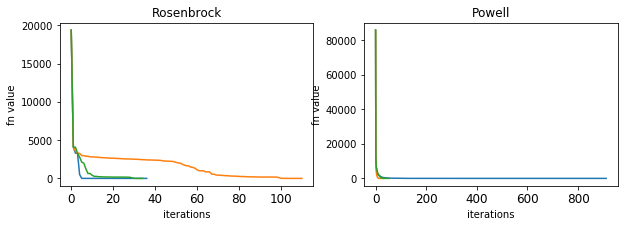

In [101]:
'''
dim = 1600
   -- [plot 1] rosenbrock
       -- steepest-descent
       -- FR-CG
       -- PR-CG
   -- [plot 2] powell
       -- steepest-descent
       -- FR-CG
       -- PR-CG
'''
start_it = 0

# Plot 1
f1_sd = encode(filter(fns='rosenbrock', dims=1600, solvers='steepest-descent')[0])
f1_frcg = encode(filter(fns='rosenbrock', dims=1600, solvers='fr-cg')[0])
f1_prcg = encode(filter(fns='rosenbrock', dims=1600, solvers='pr-cg')[0])

with open(f1_sd, 'rb') as f: rosenbrock_sd = pickle.load(f)
with open(f1_frcg, 'rb') as f: rosenbrock_frcg = pickle.load(f)
with open(f1_prcg, 'rb') as f: rosenbrock_prcg = pickle.load(f)
    
fig = plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.title('Rosenbrock')
plt.xlabel('iterations')
plt.ylabel('fn value')
plt.plot(
    [pt['iter'] for pt in rosenbrock_sd['plot_data'][start_it:]],
    [pt['fx'] for pt in rosenbrock_sd['plot_data'][start_it:]],
    label='steepest-descent'
)
plt.plot(
    [pt['iter'] for pt in rosenbrock_frcg['plot_data'][start_it:]],
    [pt['fx'] for pt in rosenbrock_frcg['plot_data'][start_it:]],
    label='FR-CG'
)
plt.plot(
    [pt['iter'] for pt in rosenbrock_prcg['plot_data'][start_it:]],
    [pt['fx'] for pt in rosenbrock_prcg['plot_data'][start_it:]],
    label='PR-CG'
)
 
    
# Plot 2
f2_sd = encode(filter(fns='powell', dims=1600, solvers='steepest-descent')[0])
f2_frcg = encode(filter(fns='powell', dims=1600, solvers='fr-cg')[0])
f2_prcg = encode(filter(fns='powell', dims=1600, solvers='pr-cg')[0])

with open(f2_sd, 'rb') as f: powell_sd = pickle.load(f)
with open(f2_frcg, 'rb') as f: powell_frcg = pickle.load(f)
with open(f2_prcg, 'rb') as f: powell_prcg = pickle.load(f)
    
plt.subplot(1, 2, 2)
plt.title('Powell')
plt.xlabel('iterations')
plt.ylabel('fn value')
plt.plot(
    [pt['iter'] for pt in powell_sd['plot_data'][start_it:]],
    [pt['fx'] for pt in powell_sd['plot_data'][start_it:]],
    label='steepest-descent'
)
plt.plot(
    [pt['iter'] for pt in powell_frcg['plot_data'][start_it:]],
    [pt['fx'] for pt in powell_frcg['plot_data'][start_it:]],
    label='FR-CG'
)
plt.plot(
    [pt['iter'] for pt in powell_prcg['plot_data'][start_it:]],
    [pt['fx'] for pt in powell_prcg['plot_data'][start_it:]],
    label='PR-CG'
)
plt.show()